## Семинар 11. Jupyter Notebook и несколько слов об аналитике

### Даны две функции:

```f(x) = x^3 - 50x```

```g(x) = -x^4 + 88x^2 - 241```

In [1]:
from sympy import *
from sympy.abc import x
f = g = Function('f')

f = x ** 3 - 50 * x
g = -x ** 4 + 88 * x ** 2 - 241

1. Найти координаты точек пересечения

In [2]:
cross_points = [{'y': f.subs(x, cross_x), 'x': cross_x} for cross_x in solve(f - g, x)]
# for point in cross_points:
#     print(
#         f'x = {point["x"]}\n'
#         f'y = {point["y"]}\n\n'
#         )
print('Точек пересечения:', len(cross_points))

Точек пересечения: 4


In [3]:
cross_points[0]['x']

-1/4 - sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))/2 - sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)))/2

In [4]:
cross_points[0]['y']

25/2 + 25*sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) + (-1/4 - sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))/2 - sqrt(707/6 - 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3) - 47/(4*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))) - 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)))/2)**3 + 25*sqrt(707/12 + 5393/(9*(198439/432 + sqrt(61480244863)*I/48)**(1/3)) + 2*(198439/432 + sqrt(61480244863)*I/48)**(1/3))

и так далее.

2. Построить графики функций в одной системе координат

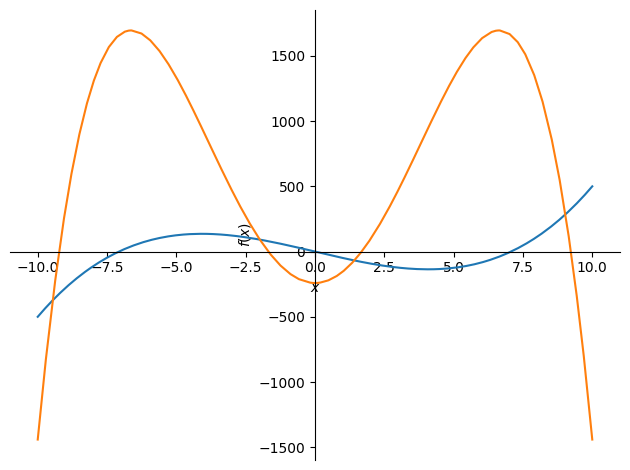

In [5]:
from sympy.plotting import plot
plot(f, g)


3. Построить график функции пересечения

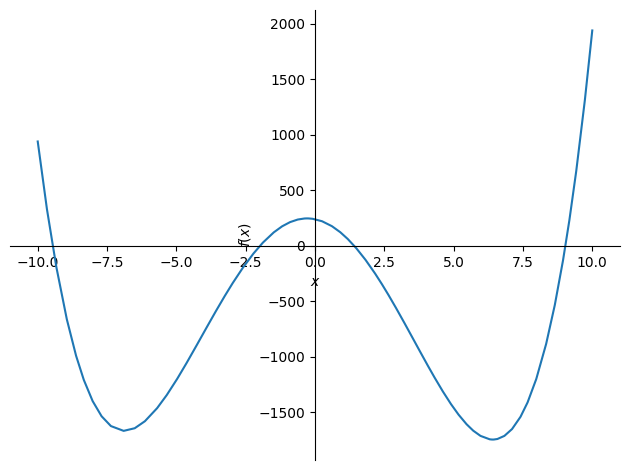

In [6]:
plot(f-g)